In [1]:
import warnings

import pandas as pd

from alphastats.dataset.dataset import DataSet

warnings.filterwarnings(
    "ignore", category=UserWarning, module="openpyxl"
)  # remove warning from mac

# Workflow Example
## MaxQuant

To perform a downstream analysis on MaxQuant output data we requirer the `proteinGroups.txt` file generated by MaxQuant. To gain biological insight between various phenotypes an additional metadata file should be provided. Hereby the sample names match with the sample names in the proteinGroups.txt file. 
At first take a look at the files:
The `proteinGroups.txt` contains all standard column headers from MaxQuant. Later, for our analysis we will use 
the Protein Intensity described in `"LFQ intensity [sample]"`.

In [2]:
protein_groups = pd.read_csv(
    "../testfiles/maxquant/proteinGroups.txt", sep="\t", low_memory=False
)
protein_groups.head(5)

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
0,P01911;Q29830;Q9MXZ4;Q3LTJ8;Q3LTJ4;Q3LRY0;Q8HW...,P01911;Q29830;Q9MXZ4;Q3LTJ8;Q3LTJ4;Q3LRY0;Q8HW...,4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;...,4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;...,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,"HLA class II histocompatibility antigen, DRB1-...",HLA-DRB1;HLA-DR15;HLA-DRB1*;HLA-DRB1*1327;MHC ...,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...,1834.0,4.0,...,NaN,0.0,1287;1288;3971;15222,True;True;True;True,1415;1416;4387;16993,117340;117341;117342;117343;117344;117345;1173...,56384;56385;56386;159948;159949;159950;602426;...,56384;56385;159949;602427,NaN,NaN
1,P05121;A0A024QYT5;B7ZAB0;B7Z4X6;B7Z1D9,P05121;A0A024QYT5;B7ZAB0;B7Z4X6;B7Z1D9,10;10;9;8;5,10;10;9;8;5,10;10;9;8;5,Plasminogen activator inhibitor 1,SERPINE1,;;;;,5.0,10.0,...,NaN,1.0,1592;3771;4396;4628;6470;7404;9193;11222;13191...,True;True;True;True;True;True;True;True;True;True,1746;4166;4871;5128;7155;8188;10148;10149;1257...,136637;136638;136639;136640;136641;318672;3186...,64917;149749;149750;178775;178776;184126;25946...,64917;149749;178775;184126;259465;290355;36587...,NaN,NaN
2,P55083;A0A024QZ34;K7ES70,P55083;A0A024QZ34;K7ES70,2;2;2,2;2;2,2;2;2,Microfibril-associated glycoprotein 4,MFAP4,;;,3.0,2.0,...,NaN,2.0,140;15067,True;True,155;156;16823,13174;13175;13176;13177;13178;13179;13180;1318...,7599;7600;7601;7602;7603;7604;7605;7606;598026...,7604;598026,0,117
3,P09972;A0A024QZ64;A8MVZ9;B7Z3K9;B7Z1N6;B7Z3K7;...,P09972;A0A024QZ64;A8MVZ9;B7Z3K9;B7Z1N6;B7Z3K7;...,16;16;15;15;13;12;10;10;9;8;7;7;7;5,13;13;13;12;10;10;9;9;8;5;7;7;6;4,2;2;2;2;0;2;2;2;2;0;2;2;0;0,Fructose-bisphosphate aldolase C;Fructose-bisp...,ALDOC,;;;;;;;;;,14.0,16.0,...,NaN,3.0,312;749;1545;1675;2085;3265;5046;5708;8847;884...,True;True;True;False;True;True;True;True;True;...,346;827;1698;1838;2304;3606;5586;5587;6314;976...,29006;29007;29008;69091;69092;69093;69094;6909...,15520;15521;34013;34014;34015;34016;34017;6325...,15520;34015;63252;67942;84108;131214;198759;21...,1;2,40;251
4,Q96C19;H0Y4Y4;A0A024QZ77,Q96C19;H0Y4Y4;A0A024QZ77,1;1;1,1;1;1,1;1;1,EF-hand domain-containing protein D2,EFHD2,;;,3.0,1.0,...,NaN,4.0,8772,True,9685,734937;734938;734939;734940;734941;734942;734943,342134;342135,342134,NaN,NaN


Further, we created a excel-file with the corresponding metadata to our proteinGroups.txt-file. The sample names in the column "sample" match the names in `proteinGroups.txt` file.

In [3]:
metadata = pd.read_excel("../testfiles/maxquant/metadata.xlsx")
metadata.head(5)

,subject external_id,biological_sample external_id,sample,tissue id,disease id,intervention id,tissue,disease,biological_sample quantity,biological_sample quantity_units,...,Alanine aminotransferase measurement (34608000),Aspartate aminotransferase measurement (45896001),Alkaline phosphatase measurement (88810008),Gamma glutamyl transferase measurement (69480007),Hemoglobin A1c measurement (43396009),Total cholesterol:HDL ratio measurement (166842003),High density lipoprotein measurement (17888004),Low density lipoprotein cholesterol measurement (113079009),VLDL cholesterol measurement (104585005),Triglycerides measurement (14740000)
0,31,31,1_31_C6,BTO:0000131,NaN,NaN,blood plasma,healthy,NaN,NaN,...,24.0,30,54,21.0,6.3,3.6,1.26,2.1,0.3,0.58
1,32,32,1_32_C7,BTO:0000131,NaN,NaN,blood plasma,healthy,NaN,NaN,...,27.0,28,27,38.0,5.8,6.6,1.70,4.3,0.6,1.24
2,33,33,1_33_C8,BTO:0000131,NaN,NaN,blood plasma,healthy,NaN,NaN,...,18.0,21,69,18.0,6.2,5.7,1.12,4.1,0.5,1.12
3,34,34,1_34_C9,BTO:0000131,NaN,NaN,blood plasma,healthy,NaN,NaN,...,22.0,26,101,20.0,6.2,6.7,0.91,4.8,1.0,2.20
4,35,35,1_35_C10,BTO:0000131,NaN,NaN,blood plasma,healthy,NaN,NaN,...,18.0,25,61,13.0,5.4,5.5,1.21,3.9,0.4,0.90


## Start Downstream Analysis

## 0. Import AlphaStats

Import library alphastats

In [4]:
import alphastats

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 1. Import Data
Load the MaxQuant proteinGroups.txt file and specify the columns indicating the intensity as well as the column that is used for indexing, like here the "Protein IDs" or the gene names. As the column is used for indexing, the values of this column must be unqiue. 

In [5]:
maxquant_data = alphastats.loaders.MaxQuantLoader(
    file="../testfiles/maxquant/proteinGroups.txt",
    intensity_column="LFQ intensity [sample]",
    index_column="Protein IDs",
)

/Users/drq441/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 2. Create a DataSet
Combine the imported MaxQuant data with the metadata

In [6]:
ds = DataSet(
    loader=maxquant_data,
    metadata_path_or_df="../testfiles/maxquant/metadata.xlsx",
    sample_column="sample",  # specify the column that corresponds to the sample names in proteinGroups
)

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:	Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).


AlphaStats will create a matrix of the Protein Intensities, which will be accessable using `ds.mat` and will save the metadata as a dataframe `ds.metadata`. 
Our original MaxQuant ProteinGroup file contains much more samples, than we have metadata for

## 3. Preprocess

In [7]:
print(
    f"Number of samples in the matrix: {ds.mat.shape[0]}, number of samples in metadata: {ds.metadata.shape[0]}."
)

Number of samples in the matrix: 312, number of samples in metadata: 48.


Firstly, we will subset the matrix it will only contains samples, that are also described in the metadata.

In [8]:
ds.preprocess(subset=True)

In [9]:
print(
    f"Number of samples in the matrix: {ds.mat.shape[0]}, number of samples in metadata: {ds.metadata.shape[0]}."
)

Number of samples in the matrix: 48, number of samples in metadata: 48.


#### Unnormalized data, Sample Distribution

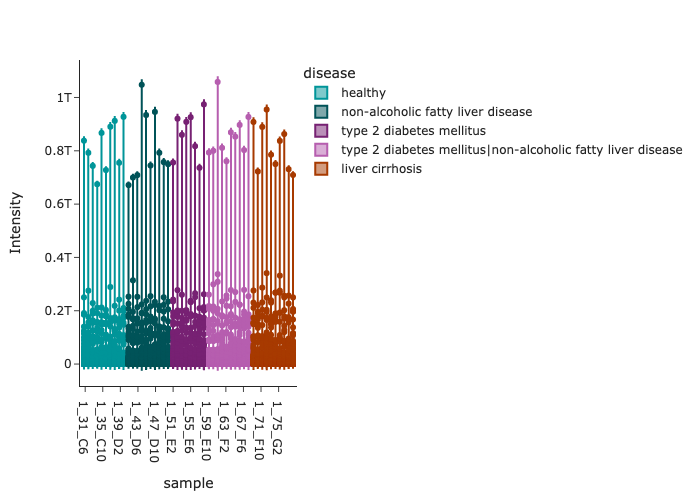

In [10]:
ds.plot_sampledistribution(color="disease").show(renderer="png")

- Contaminations get removed indicated in following columns Only identified by site, Reverse, Potential contaminant (MaxQuant specific) and contamination_library (added by AlphaStats)
- Normalized using quantile normalization
- Missing Values get imputed using K-nearest neighbour imputation

In [11]:
ds.preprocess(remove_contaminations=True, normalization="quantile", imputation="knn")

/Users/drq441/opt/anaconda3/lib/python3.9/site-packages/alphastats/DataSet_Preprocess.py:41: FutureWarning:

In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.



#### After quantile normalization, Sample Distribution

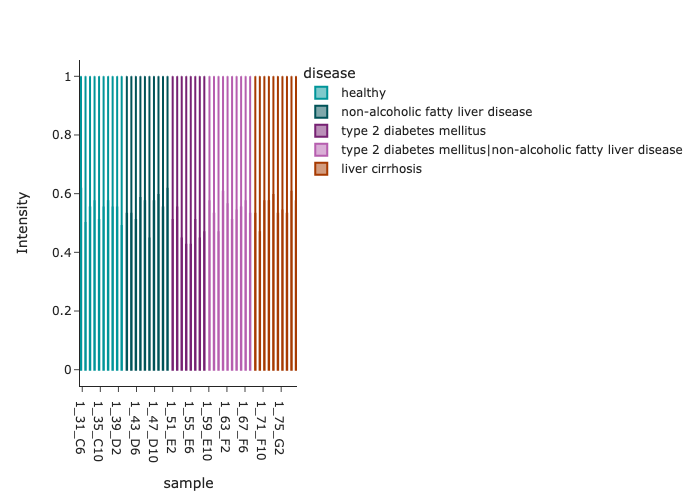

In [12]:
ds.plot_sampledistribution(method="box", color="disease").show(renderer="png")

The preprocessing steps can be accessed using:

In [13]:
ds.preprocessing_info

{'Raw data number of Protein Groups': 2596,
 'Matrix: Number of ProteinIDs/ProteinGroups': 1318,
 'Matrix: Number of samples': 48,
 'Intensity used for analysis': 'LFQ intensity [sample]',
 'Normalization': 'quantile',
 'Imputation': 'k-Nearest Neighbor',
 'Contaminations have been removed': True,
 'Contamination columns': ['Only identified by site',
  'Reverse',
  'Potential contaminant',
  'contamination_library'],
 'Number of removed ProteinGroups due to contaminaton': 46}

## 4. Visualization

### Principal Component Analysis (PCA)

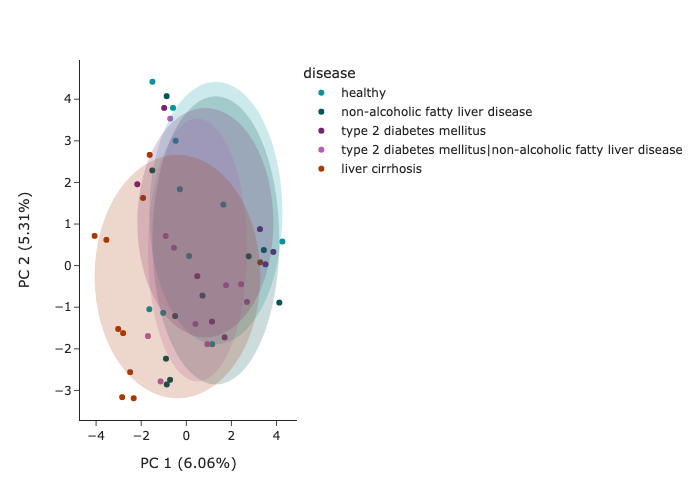

In [14]:
ds.plot_pca(group="disease", circle=True).show(renderer="png")